# Data Analysing

 Mengimport Library yang dibutuhkan

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

 membaca file


In [3]:
df = pd.read_csv("ai_dev_productivity.csv")

Menampilkan 5 data teratas

In [4]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


Menampilkan 5 data terakhir

In [13]:
df.tail()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0
499,2.23,252,4,8.8,0,0,1.05,2.6,0


melihat jumlah,tipe data, dan statistik dari keseluruhan data

In [15]:
df.shape

(500, 9)

In [5]:
df.columns.values

array(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'], dtype=object)

In [19]:
df.dtypes

hours_coding        float64
coffee_intake_mg      int64
distractions          int64
sleep_hours         float64
commits               int64
bugs_reported         int64
ai_usage_hours      float64
cognitive_load      float64
task_success          int64
dtype: object

In [21]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


Text(0.5, 1.0, 'Jumlah Kesuksesan Program/Tugas')

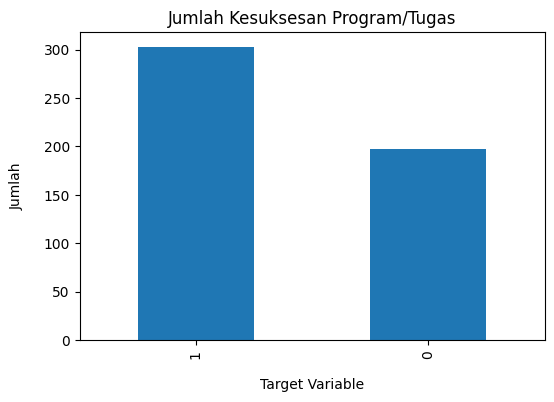

In [4]:
df['task_success'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Jumlah", labelpad= 14)
plt.title("Jumlah Kesuksesan Program/Tugas")

In [5]:
100*df['task_success'].value_counts()/len(df['task_success'])

task_success
1    60.6
0    39.4
Name: count, dtype: float64

In [6]:
df['task_success'].value_counts()

task_success
1    303
0    197
Name: count, dtype: int64

- data munjukkan bahwa tugas yang selesai lebih banyak dari yang tidak selesai
perbandingannya = 60.6% banding 39.4%(303 banding 197)

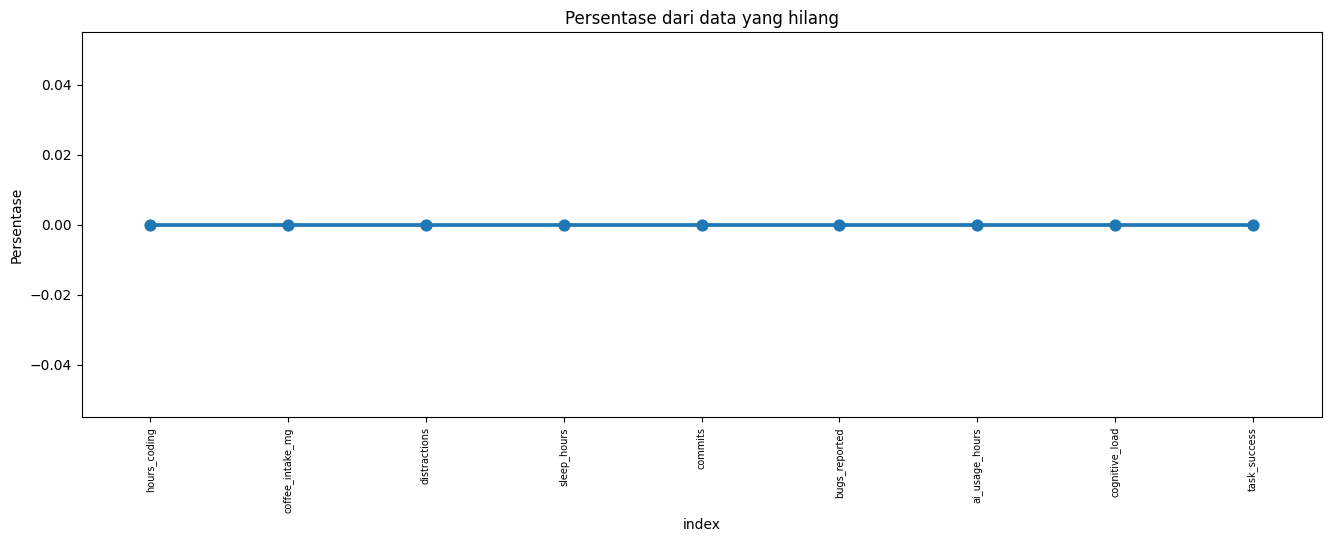

In [12]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Persentase dari data yang hilang")
plt.ylabel("Persentase")
plt.show()

- Data yang di selidiki aman dari missing value

## Exporing data


In [4]:
df1 = df.copy()
df1.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


**Analysis**

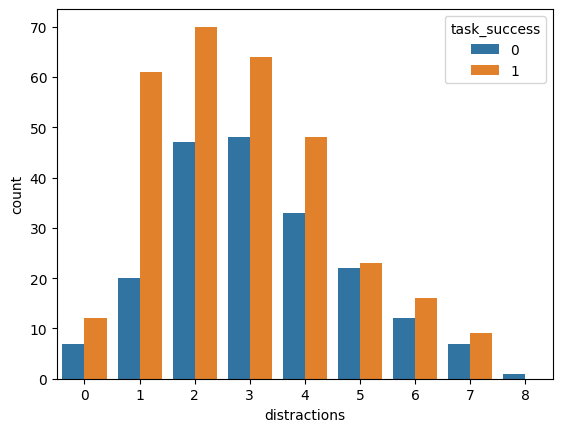

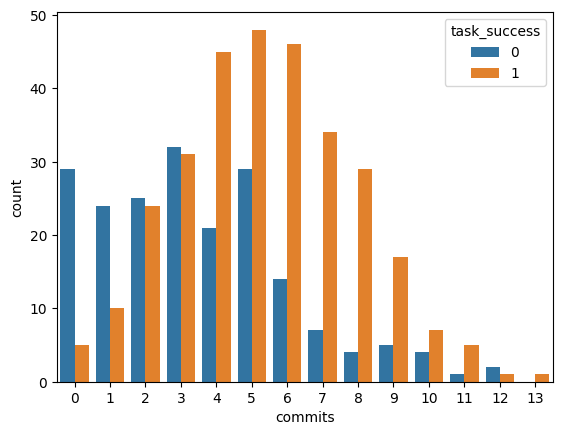

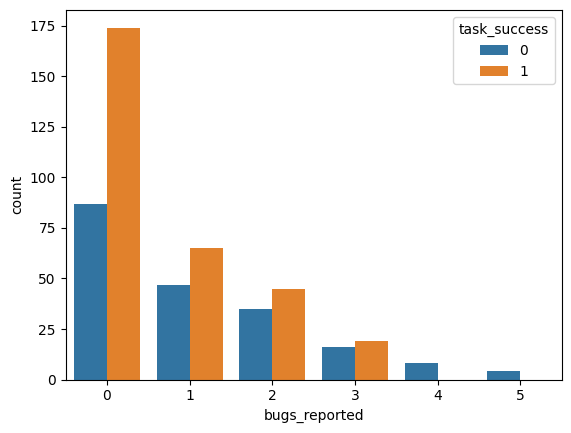

In [6]:
for i, predictor in enumerate(df1.drop(columns=[
    'task_success','hours_coding'
    ,'coffee_intake_mg','sleep_hours','ai_usage_hours','cognitive_load'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='task_success')

- kebanyakan task yang selesai memiliki 1-4 distraksi, 3-8 commit, dan 0 bug report

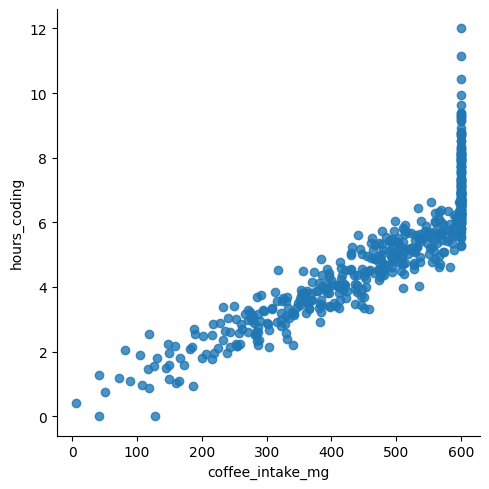

In [15]:
sns.lmplot(data=df1, y='hours_coding',x='coffee_intake_mg',fit_reg=False)

<Axes: >

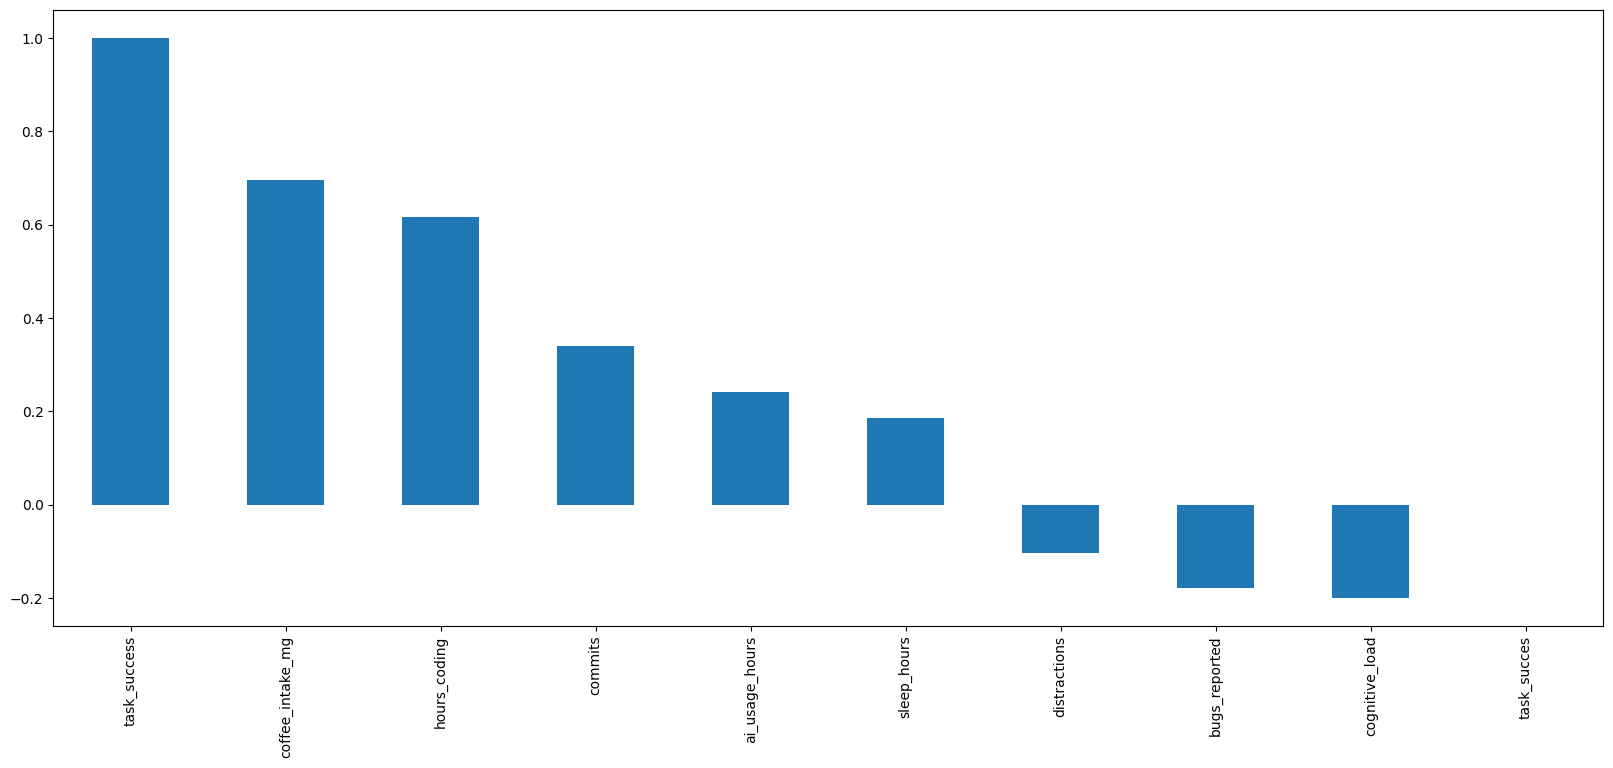

In [16]:
plt.figure(figsize=(20,8))
df1.corr()['task_success'].sort_values(ascending = False).plot(kind='bar')

Relasi yang tinggi terhadap task yang succes berpengaruh pada coffe_intake, hours_coding, commit, dan ai_usage_hours.
mengartikan bahwa semakin banyak coffe yang dikonsumsi, waktu yang dihabiskan, jumlah commit, dan penggunaan yang dilakukan membuat kesuksesan task atau tugas menjadi lebih tinggi.

Relasi yang rendah terhadap task yang gagal berpengaruh pada cognitive_load dalam status lemah(kecil)
mengartikan bahwa semakin banyak cognitive_load(beban mental) yang dimiliki membuat kesuksesan task atau tugas menjadi lebih rendah.

Relasi yang lemah (0.2 - (-0.2)) terhadap task yang succes yaitu sleep_hours, distraction, dan bugs_reported.
mengartikan bahwa jam tidur, gangguan, dan pelaporan bug tidak berpengaruh kuat, baik terhadap tugas yang selesai dan tugas yang gagal.

Kesimpulan di atas juga di visualisasikan dan disimpulkan pada Heatmap di bawah

<Axes: >

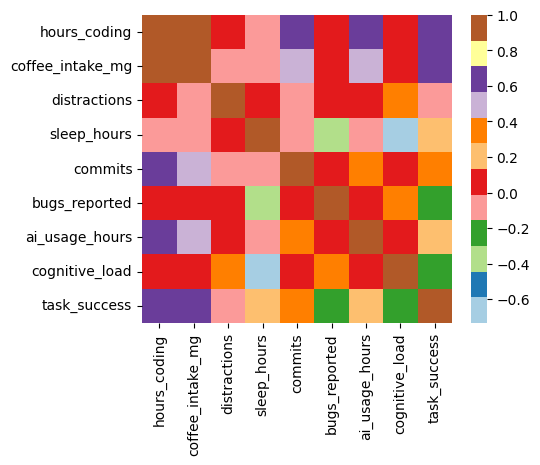

In [6]:
plt.figure(figsize=(5,4))
sns.heatmap(df1.corr(), cmap="Paired")

**Kesimpulan**
- data aman dari missing value
- data munjukkan bahwa tugas yang selesai lebih banyak dari yang tidak selesai
perbandingannya = 60.6% banding 39.4%(303 banding 197)
- kebanyakan task yang selesai memiliki 1-4 distraksi, 3-8 commit, dan 0 bug report
- banyaknya jumlah konsumsi coffe, waktu coding, commit, dan penggunaan ai membuat kesuksesan lebih tinggi
- banyaknya beban mental sedikit berpengaruh terhadap kegagalan tugas yang lebih tinggi. 


**yang harus dilakukan**
- feature scaling
- feature selection